Multipel linjär regression:

$\mu (x1,x2,x3) = B0 + b1X1 + B2x2, B3x3$

$Y = $

In [1]:
import pandas as pd

adv = pd.read_csv("Advertising.csv", index_col=0)
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
import numpy as np

test_df = pd.DataFrame(adv[:10])
X_test = np.column_stack([np.ones(10),test_df["TV"], test_df["radio"], test_df["TV"]*test_df["radio"]])
Y_test = test_df["sales"]

train_df = pd.DataFrame(adv[10:160])
X_train = np.column_stack([np.ones(150),train_df["TV"], train_df["radio"], train_df["TV"]*train_df["radio"]])
Y_train = train_df["sales"]

val_df = pd.DataFrame(adv[160:])
X_val = np.column_stack([np.ones(40),val_df["TV"], val_df["radio"], val_df["TV"]*val_df["radio"]])
Y_val = val_df["sales"]


# X_val, Y_val = 
# Y = adv["sales"]
# X = np.column_stack([np.ones(Y.shape[0]),adv["TV"], adv["radio"], adv["TV"]*adv["radio"]])
# X


$$\hat{\beta}=(X^TX)^{-1}X^TY$$

SSE
$$\sum [yi-(b0 + b1x1i+...bkxki)]^2$$

In [3]:
b = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ Y_train # uppskattning av koefficienten
k = len(b)-1
n = Y_train.shape[0]
SSE = np.sum(np.square(Y_train-(X_train @ b)))
var = SSE/(n-k-1)
S = np.sqrt(var)

Syy = (n*np.sum(np.square(Y_train)) - np.square(np.sum(Y_train)))/n
SSR = Syy - SSE
# SSR2 = (n*np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y))))/n #resudialen, räknat på alternativt sätt

SSR

3923.9111547662233

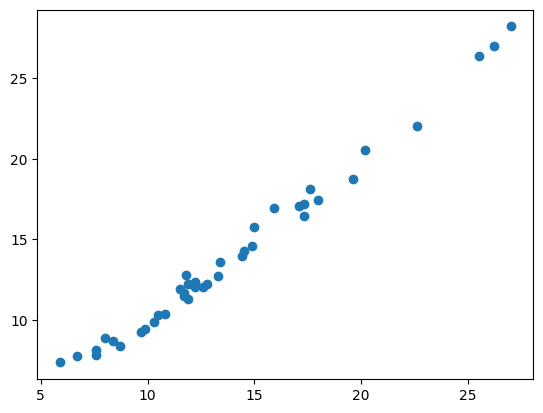

In [4]:
import matplotlib.pyplot as plt

plt.scatter(Y_val, X_val @ b);

In [5]:
b

array([6.88157647e+00, 1.86678349e-02, 2.42869419e-02, 1.10431159e-03])

In [6]:
Rsq = SSR/Syy
Rsq
# Välj 90% som confidence level

0.9635357836414286

In [7]:
import scipy.stats as stats
# H0: all B = 0
sig_statistics = (SSR/k)/S
p_significance = stats.f.sf(sig_statistics, k, n-k-1) # räknar ut p värdet
p_significance

5.440747174579614e-105

In [8]:
# we reject the null-hypothesis, regression IS significant

Variance/Co-variance matrix: $$c = (X^TX)^{-1} \sigma^2$$

In [9]:
c = np.linalg.pinv(X_train.T@X_train)*var

#H0: b3 is irrelevant, B = 0
b3_statistic = b[3] / (S*np.sqrt(c[3,3]))
p_b3 = 2*min(stats.t.cdf(b3_statistic, n-k-1), stats.t.sf(b3_statistic, n-k-1))
p_b3

3.121476295819228e-33

In [10]:
RSE = np.sqrt((1/(n-2))*SSE)
RSE



1.0016782490613831

In [11]:
SSE_test = np.sum(np.square(Y_test-(X_test @ b)))
RSE_test = np.sqrt((1/(n-2))*SSE)
RSE, RSE_test


(1.0016782490613831, 1.0016782490613831)

Normalisera datan för labben
räkna ut std avvikselsen och delar med 

signifikans test för räkna ut bias för observatörer

Y = flow (vi vill förutsäga flödet)
